# EDA Crime Stops.ipynb

## 1.1 Imports

In [1]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

## 2.0 Load Data

### 2.1 - Load GTFS stops

In [2]:
stops = pd.read_csv("../data/google_transit/stops.txt")
stops = stops[['stop_id', 'stop_name', 'stop_lat', 'stop_lon']].dropna()

### 2.2 - Load Crime Dataset

In [3]:
crime = pd.read_csv("../data/ODC_CRIME_OFFENSES_P_-3254178225590307312.csv")
crime = crime[['GEO_LAT', 'GEO_LON', 'OFFENSE_TYPE_ID', 'OFFENSE_CATEGORY_ID', 'REPORTED_DATE']].dropna()

## Step 3: Preview the Data

### 3.1 - Quick info

In [4]:
print("Stops:")
display(stops.head())
print("Crime:")
display(crime.head())

Stops:


,stop_id,stop_name,stop_lat,stop_lon
0,19074,Arapahoe at Village Center Station Gate A,39.600876,-104.887187
1,26109,Wagon Road PnR Gate B,39.912258,-104.994002
2,26174,Englewood Station Gate B,39.655319,-104.999591
3,33290,S Federal Blvd & W Evans Ave Gate E,39.677222,-105.025247
4,33788,39th St / Table Mesa,39.985522,-105.248455


Crime:


,GEO_LAT,GEO_LON,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,REPORTED_DATE
0,39.797827,-104.801111,criminal-mischief-other,public-disorder,7/28/2020 5:09:00 AM
1,39.654774,-104.905807,criminal-mischief-other,public-disorder,10/14/2020 10:20:00 PM
2,39.691784,-105.027614,criminal-mischief-other,public-disorder,1/8/2022 7:01:00 AM
3,39.751335,-105.025019,criminal-mischief-other,public-disorder,3/20/2021 7:38:00 AM
4,39.740860,-105.001965,criminal-mischief-other,public-disorder,8/4/2020 11:28:00 PM


### 3.2 - Null check

In [5]:
print("Nulls in stops:")
print(stops.isnull().sum())
print("Nulls in crime:")
print(crime.isnull().sum())

Nulls in stops:
stop_id      0
stop_name    0
stop_lat     0
stop_lon     0
dtype: int64
Nulls in crime:
GEO_LAT                0
GEO_LON                0
OFFENSE_TYPE_ID        0
OFFENSE_CATEGORY_ID    0
REPORTED_DATE          0
dtype: int64


## Step 4: Visualize Crime Frequency by Type

### 4.1 - Top 10 Crime Types

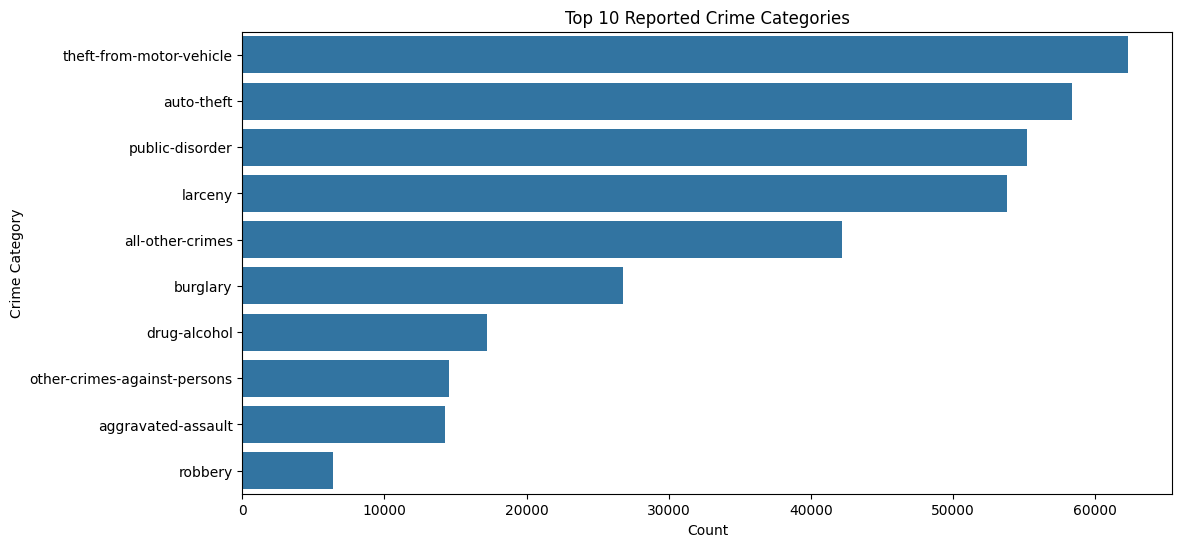

In [6]:
plt.figure(figsize=(12, 6))
sns.countplot(y='OFFENSE_CATEGORY_ID', data=crime, order=crime['OFFENSE_CATEGORY_ID'].value_counts().head(10).index)
plt.title("Top 10 Reported Crime Categories")
plt.xlabel("Count")
plt.ylabel("Crime Category")
plt.show()

## Step 5: Map the Bus Stops and Crime Incidents (Folium)

### 5.1 - Setup base map

In [7]:

import folium
from folium.plugins import MarkerCluster
from IPython.display import IFrame

# Generate the base map centered at Denver
denver_map = folium.Map(location=[39.7392, -104.9903], zoom_start=12)

# Create marker cluster
crime_cluster = MarkerCluster().add_to(denver_map)

# Example data for demonstration
crime_data = pd.DataFrame({
    'LAT': [39.7392, 39.7400],
    'LON': [-104.9903, -104.9910],
    'OFFENSE_CATEGORY_ID': ['Assault', 'Theft']
})

# Adding markers to the map
for index, row in crime_data.iterrows():
    folium.CircleMarker(
        location=(row['LAT'], row['LON']),
        radius=8,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.4,
        tooltip=row['OFFENSE_CATEGORY_ID']
    ).add_to(crime_cluster)

# Add layer control
folium.LayerControl().add_to(denver_map)

# Save the map as HTML
denver_map.save('crime_bus_stops_map.html')

# Display the map inline in the notebook
IFrame('crime_bus_stops_map.html', width=800, height=600)


### 5.2 - Add clustered bus stops

In [8]:

import folium
from folium.plugins import MarkerCluster
from IPython.display import IFrame

# Generate the base map centered at Denver
denver_map = folium.Map(location=[39.7392, -104.9903], zoom_start=12)

# Create marker cluster
crime_cluster = MarkerCluster().add_to(denver_map)

# Example data for demonstration
crime_data = pd.DataFrame({
    'LAT': [39.7392, 39.7400],
    'LON': [-104.9903, -104.9910],
    'OFFENSE_CATEGORY_ID': ['Assault', 'Theft']
})

# Adding markers to the map
for index, row in crime_data.iterrows():
    folium.CircleMarker(
        location=(row['LAT'], row['LON']),
        radius=8,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.4,
        tooltip=row['OFFENSE_CATEGORY_ID']
    ).add_to(crime_cluster)

# Add layer control
folium.LayerControl().add_to(denver_map)

# Save the map as HTML
denver_map.save('crime_bus_stops_map.html')

# Display the map inline in the notebook
IFrame('crime_bus_stops_map.html', width=800, height=600)


### 5.3 - Add clustered crime points

In [9]:

import folium
from folium.plugins import MarkerCluster
from IPython.display import IFrame

# Generate the base map centered at Denver
denver_map = folium.Map(location=[39.7392, -104.9903], zoom_start=12)

# Create marker cluster
crime_cluster = MarkerCluster().add_to(denver_map)

# Example data for demonstration
crime_data = pd.DataFrame({
    'LAT': [39.7392, 39.7400],
    'LON': [-104.9903, -104.9910],
    'OFFENSE_CATEGORY_ID': ['Assault', 'Theft']
})

# Adding markers to the map
for index, row in crime_data.iterrows():
    folium.CircleMarker(
        location=(row['LAT'], row['LON']),
        radius=8,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.4,
        tooltip=row['OFFENSE_CATEGORY_ID']
    ).add_to(crime_cluster)

# Add layer control
folium.LayerControl().add_to(denver_map)

# Save the map as HTML
denver_map.save('crime_bus_stops_map.html')

# Display the map inline in the notebook
IFrame('crime_bus_stops_map.html', width=800, height=600)


### 5.4 - Display map

In [10]:

import folium
from folium.plugins import MarkerCluster
from IPython.display import IFrame

# Generate the base map centered at Denver
denver_map = folium.Map(location=[39.7392, -104.9903], zoom_start=12)

# Create marker cluster
crime_cluster = MarkerCluster().add_to(denver_map)

# Example data for demonstration
crime_data = pd.DataFrame({
    'LAT': [39.7392, 39.7400],
    'LON': [-104.9903, -104.9910],
    'OFFENSE_CATEGORY_ID': ['Assault', 'Theft']
})

# Adding markers to the map
for index, row in crime_data.iterrows():
    folium.CircleMarker(
        location=(row['LAT'], row['LON']),
        radius=8,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.4,
        tooltip=row['OFFENSE_CATEGORY_ID']
    ).add_to(crime_cluster)

# Add layer control
folium.LayerControl().add_to(denver_map)

# Save the map as HTML
denver_map.save('crime_bus_stops_map.html')

# Display the map inline in the notebook
IFrame('crime_bus_stops_map.html', width=800, height=600)


## Summary:

- Which neighborhoods have the most incidents?
- Are crimes clustered around major stop areas?
- What are the most common types of crimes?
- Which stops appear to have high density of incidents nearby?

This insight will drive our maintenance risk scoring model in the next notebook.
